In [76]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import pandas as pd
#import corner

In [2]:
f=open('fit_ejercise.npy', 'r')
f=np.load('fit_ejercise.npy')
f

array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 8.11257148,  3.52815075,  4.81023356,  0.89238164,  3.13295195,
         3.53338034,  1.89933975,  2.83896349,  0.89713921,  0.9500022 ,
         1.45700044,  1.05318568,  1.71011605,  0.06780647,  0.40019114,
         1.00444563, -0.02239716,  0.35714018,  0.

<ErrorbarContainer object of 3 artists>

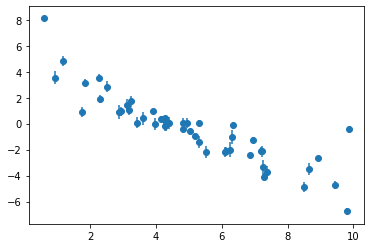

In [3]:
x=f[0]
y=f[1]
err=f[2]
plt.errorbar(x, y, yerr=err,  xerr=None, fmt='o', label='data')

In [63]:
def line (x,m,b):                       # Modelo a probar
    return ((m*x)+b)

def chisq2(theta, data):                 # Donde theta son los datos que se generan a aprtir del montecarlo 
    x= data[0]                          # (theta(0) es la pendiente (a) y theta(1) es la ordenada al origen (b)
    y= data[1]                           # y theta[2] es el error)
    yerr= data[2]                        
    #lo siguiente depende del modelo 
    model= line(x, theta[0], theta[1])
    err_corr2= yerr**2 + ((theta[2]**2)*model**2) 
    chisq= (y-model)**2 / yerr**2  + np.log(err_corr2)
    return chisq.sum()

def comparacion_pr(chisq_ini, chisq_new):  #funcioón para comparar los modelos
    a=np.log(np.random.uniform(0,1))
    
    if chisq_new < chisq_ini:
        
        chisq_ini= chisq_new
        acc=True
        
    elif (chisq_ini-chisq_new) > a:
        chisq_ini= chisq_new
        acc=True
    
    else: 
        chisq_ini= chisq_ini
        acc=False
            
    return chisq_ini, acc

def montecarlo1(a_ini, b_ini,sf2, data, s2, n):  #donde s2 esel sigma cuadrada, ya que el sigma es el que tiene
                                                         # mas peso entonces sf2 tiene que ser de un orden menor que 
                                                         #sigma, mientras que el valor se tiene que encontrar entre 0 y 1
    f_ini=0.5
    f=np.zeros(n)
    chisqr_stor=np.zeros(n)
    a=np.zeros(n)
    b=np.zeros(n)
    k=0               #Contador devalores acepados
    
    for i in range(n):
    
        a[i]=a_ini
        b[i]=b_ini
        f[i]= f_ini
    
        a_new =s2* np.random.randn()+ a_ini
        b_new =s2* np.random.randn()+ b_ini   #Se generan los nuevos pares de parámetros
        f_new =sf2* np.random.randn()+ f_ini
            
        
        chisqr_ini=chisq2([a_ini,b_ini, f_ini], data)
        chisqr_new=chisq2([a_new,b_new, f_new], data)
        chisqr_stor[i]= chisqr_ini

        if f_new <0.0 and f_new > 1.0:
            chisqr_new='inf'

        chisq_comp,acc= comparacion_pr(chisqr_ini, chisqr_new)
            
        if acc is not True: # == chisqr_ini:
            a_ini=a_ini
            b_ini=b_ini
            f_ini=f_ini
        else:
            a_ini=a_new
            b_ini=b_new
            f_ini=f_new
            k= k + 1
        
    
    return a, b, f, chisqr_stor, k



In [69]:
param= []

for i in range (5):
    #a_ini=np.random.uniform(0,5)
    #b_ini=np.random.uniform(-1,5)
    a_ini, b_ini= -2.5,3.5
    #chisqr_ini=chisq2([a_ini,b_ini, f_ini], [x, y, err] )
    parametros=montecarlo1(a_ini, b_ini, 0.007, [x, y, err], 0.01, 10000)
    
    param.append(parametros)

param1=param[1]
k=param1[4]
k

4304

array([0.4196, 0.4304, 0.4297, 0.426 , 0.4262])

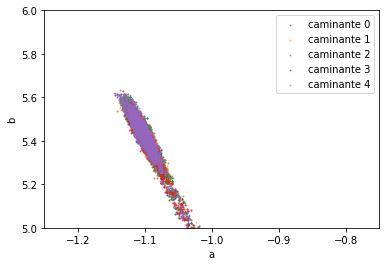

In [70]:
k=np.zeros(5)
for i in range (5):
    pa= param[i]
    plt.scatter(pa[0], pa[1], s=1, alpha=0.5, label= 'caminante {0}'.format(i))
   
    plt.xlim(-1.25,-0.75)
    plt.ylim(5,6)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.legend(frameon = True)
    k[i]=pa[4]
acc=k/10000
acc

array([-1.10498739, -1.10480565, -1.10587993, -1.10298854, -1.10440529])

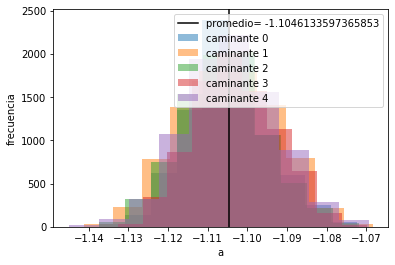

In [71]:
a_mean=np.zeros(5)
for i in range (5):
    a_c= param[i]
    a_=a_c[0]
    a_mean[i]=mean(a_[1500:])
    plt.hist(a_[1500:], alpha=0.5, label= 'caminante {0}'.format(i))
    

a_sum=sum(a_mean)
a_prom=a_sum/5

plt.axvline(a_prom, color = 'black', label = 'promedio= {0}'.format(a_prom))
plt.xlabel('a')
plt.ylabel('frecuencia')
plt.legend(frameon = True)
a_mean

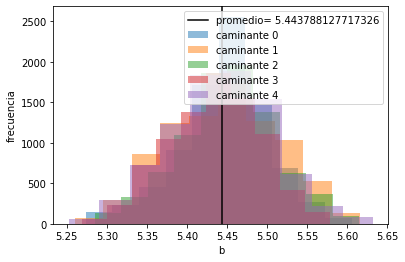

In [72]:
b_mean=np.zeros(5)
for i in range (5):
    b_c= param[i]
    b_=b_c[1]
    b_mean[i]=mean(b_[1500:])
    plt.hist(b_[1500:], alpha=0.5, label= 'caminante {0}'.format(i))

b_sum=sum(b_mean)
b_prom=b_sum/5

plt.axvline(b_prom, color = 'black', label = 'promedio= {0}'.format(b_prom))
#plt.axvline(b, color = 'black', label = 'b_real')
plt.xlabel('b')
plt.ylabel('frecuencia')
plt.legend(frameon = True)

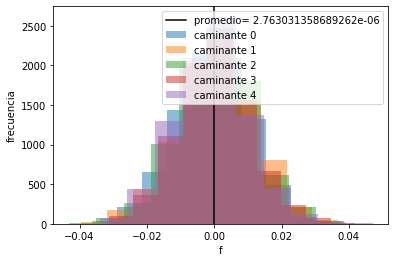

In [74]:
f_mean=np.zeros(5)
for i in range (5):
    f_c= param[i]
    f_=f_c[2]
    f_mean[i]=mean(f_[1500:])
    plt.hist(f_[1500:], alpha=0.5, label= 'caminante {0}'.format(i))

f_sum=sum(f_mean)
f_prom=f_sum/5

plt.axvline(f_prom, color = 'black', label = 'promedio= {0}'.format(f_prom))
#plt.axvline(b, color = 'black', label = 'b_real')
plt.xlabel('f')
plt.ylabel('frecuencia')
plt.legend(frameon = True)